# Get data from Wikipedea

In [1]:
import pandas as pd
import requests

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_url = requests.get(url)

In [3]:
wiki_data = pd.read_html(wiki_url.text)

In [4]:
data = wiki_data[0]

In [5]:
df = pd.DataFrame(data)

In [6]:
df = df[df.Borough != 'Not assigned']
df.reset_index(drop=True, inplace=True)

In [7]:
df.replace(to_replace='Not assigned', value=df['Borough'])

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [8]:
df.shape

(103, 3)

# Add geo_coordinates

In [9]:
url = 'http://cocl.us/Geospatial_data'
co_data = pd.read_csv(url)

In [10]:
df = pd.merge(df, co_data, how='inner', on='Postal Code')
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


# Clustering by K-means

In [11]:
from sklearn.cluster import KMeans

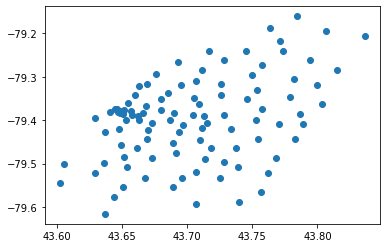

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['Latitude'], df['Longitude'])

In [16]:
import geopy

ModuleNotFoundError: No module named 'geopy'